# Route Optimization

In [31]:
!pip install seaborn 
!pip install folium 
!pip install plotly
!pip install osmnx
!pip install ortools
!pip install nbformat
!pip install scikit-learn
!pip install pandas
!pip install googlemaps
!pip install dash


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip insta

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium 
import plotly.express as px 
import osmnx as ox 
import networkx as nx 
from ortools.constraint_solver import pywrapcp 
from ortools.constraint_solver import routing_enums_pb2
import nbformat

In [33]:
dtf=pd.read_csv('trips/828AUP/142_08_41.csv')
dtf

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_code,stop_lat,stop_lon,stop_name,demand
0,142_08_41,08:41:00,08:41:00,146,0,U00191,28.614614,76.978024,Najafgarh Terminal,NaN
1,142_08_41,08:42:11,08:42:11,148,1,DC3555,28.614481,76.981062,Jharoda Crossing,NaN
2,142_08_41,08:43:49,08:43:49,149,2,DC3556,28.614150,76.985217,Health Centre,NaN
3,142_08_41,08:44:54,08:44:54,488,3,U00233,28.611746,76.985721,NajafGarh Delhi Gate,NaN
4,142_08_41,08:46:44,08:46:44,233,4,U00226,28.610319,76.981338,Police Station NajafGarh,NaN
5,142_08_41,08:48:10,08:48:10,915,5,U00193,28.611491,76.977910,Dhansa Stand,NaN
6,142_08_41,08:49:43,08:49:43,916,6,DC3547,28.610938,76.974010,Khera More,NaN
7,142_08_41,08:51:46,08:51:46,2161,7,DC4783,28.606425,76.972858,Krishna Nagar / Gopal Nagar,NaN
8,142_08_41,08:55:51,08:55:51,2162,8,DC4410,28.598773,76.966981,Khera Village,NaN
9,142_08_41,08:57:08,08:57:08,3569,9,DC5497,28.596347,76.965226,Khera Village 2,NaN


In [34]:
# Create emptstop_lon lists to store start and finish points
start_points = []
finish_points = []
stop_points = []

# Copying data and initializing the 'color' column
data = dtf.copy()
data["color"] = ''

# Assigning colors and saving start/finish points
for bus_no, group in data.groupby('trip_id'):
    start_point = group.iloc[0][['stop_lat', 'stop_lon']].tolist()
    finish_point = group.iloc[-1][['stop_lat', 'stop_lon']].tolist()
    
    start_points.append(start_point)
    finish_points.append(finish_point)
    stop_point = group.iloc[1:-1][['stop_lat', 'stop_lon']].values.tolist()
    
    data.loc[group.head(1).index, 'color'] = 'red'    # Starting points
    data.loc[group.tail(1).index, 'color'] = 'green'  # Finishing points

data.loc[data['color'] == '', 'color'] = 'black'

In [35]:
start = data[data["stop_sequence"] == 0][["stop_lat", "stop_lon"]].values[0]
start

array([28.614614, 76.978024])

In [36]:
# visualize the points on a map
map = folium.Map(location=start_point, tiles="cartodbpositron", zoom_start=14)
# Plot each start point in red
for start_point in start_points:
    folium.Marker(
        location=start_point, 
        icon=folium.Icon(color="red"), fill=True, radius=7).add_to(map)

# Plot each finish point in green
for finish_point in finish_points:
    folium.Marker(
        location=finish_point, 
        icon=folium.Icon(color="green"), fill=True, radius=7).add_to(map)

# Plot remaining stops in black
data.apply(lambda row: 
    folium.Marker(
        location=[row["stop_lat"], row["stop_lon"]],
        popup=row["stop_name"],
        color=row["color"], fill=True, radius=5).add_to(map) if row["color"] == 'black' else None, axis=1)

map

/Users/aswinjd/.pyenv/versions/3.10.13/lib/python3.10/site-packages/osmnx/graph.py:191: FutureWarning:

The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.



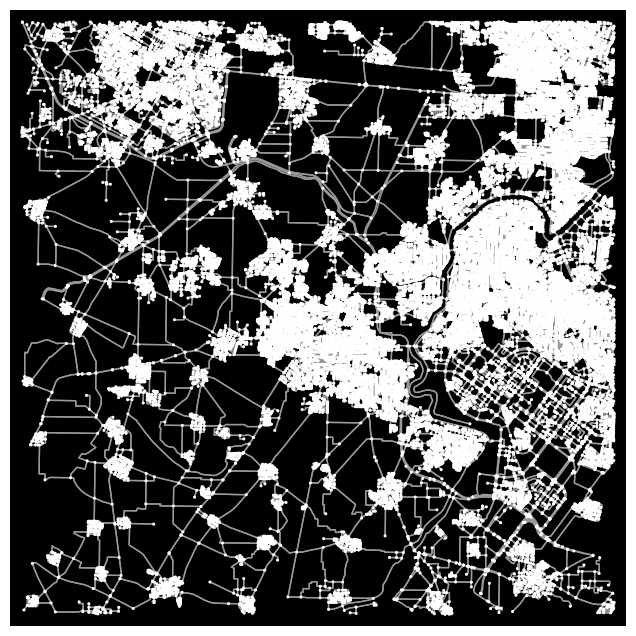

In [37]:
G=ox.graph_from_point(start, dist=10000, network_type="drive")
G=ox.add_edge_speeds(G)
G=ox.add_edge_travel_times(G)
fig,ax = ox.plot_graph(G, bgcolor="black", node_size=5 , node_color="white", figsize=(16,8))

In [38]:
start_node=ox.distance.nearest_nodes(G, start[1], start[0])
dtf["node"]=dtf[["stop_lat", "stop_lon"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
dtf=dtf.drop_duplicates("node", keep='first')
dtf

/var/folders/g2/wg8cg2yd079_cdlb5k53ggj00000gn/T/ipykernel_95160/3875464824.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/g2/wg8cg2yd079_cdlb5k53ggj00000gn/T/ipykernel_95160/3875464824.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/g2/wg8cg2yd079_cdlb5k53ggj00000gn/T/ipykernel_95160/3875464824.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/g2/wg8cg2yd079_cdlb5k53ggj00000gn/T/ipy

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_code,stop_lat,stop_lon,stop_name,demand,node
0,142_08_41,08:41:00,08:41:00,146,0,U00191,28.614614,76.978024,Najafgarh Terminal,NaN,9898810392
1,142_08_41,08:42:11,08:42:11,148,1,DC3555,28.614481,76.981062,Jharoda Crossing,NaN,9898809229
2,142_08_41,08:43:49,08:43:49,149,2,DC3556,28.614150,76.985217,Health Centre,NaN,1772701026
3,142_08_41,08:44:54,08:44:54,488,3,U00233,28.611746,76.985721,NajafGarh Delhi Gate,NaN,1765227464
4,142_08_41,08:46:44,08:46:44,233,4,U00226,28.610319,76.981338,Police Station NajafGarh,NaN,9860188819
5,142_08_41,08:48:10,08:48:10,915,5,U00193,28.611491,76.977910,Dhansa Stand,NaN,9860107987
6,142_08_41,08:49:43,08:49:43,916,6,DC3547,28.610938,76.974010,Khera More,NaN,9912555757
7,142_08_41,08:51:46,08:51:46,2161,7,DC4783,28.606425,76.972858,Krishna Nagar / Gopal Nagar,NaN,9911288053
8,142_08_41,08:55:51,08:55:51,2162,8,DC4410,28.598773,76.966981,Khera Village,NaN,9900063553
9,142_08_41,08:57:08,08:57:08,3569,9,DC5497,28.596347,76.965226,Khera Village 2,NaN,9900063559


In [39]:
def f(a , b):
    try:
        d=nx.shortest_path_length(G, source=a, target=b, method='dijkstra', weight='travel_time')
    except:
        d=np.nan
    return d

distance_matrix=np.asarray([[f(a,b)for b in dtf["node"].tolist()] for a in dtf["node"].tolist()])
distance_matrix=pd.DataFrame(distance_matrix, columns=dtf["node"].values, index=dtf["node"].values)

distance_matrix

,9898810392,9898809229,1772701026,1765227464,9860188819,9860107987,9912555757,9911288053,9900063553,9900063559,...,9900063601,9900063606,1665959773,11836671405,413880399,413880396,413880387,1806564582,1806564594,1806564631
9898810392,0.0,97.8,76.1,93.5,157.8,173.3,156.9,210.0,280.0,307.4,...,816.7,942.5,987.8,989.6,1072.4,1109.3,1164.7,1360.5,1417.9,1458.1
9898809229,86.7,0.0,38.2,55.6,119.9,146.1,158.4,211.5,281.5,308.9,...,818.2,944.0,989.3,991.1,1073.9,1110.8,1166.2,1362.0,1419.4,1459.6
1772701026,135.5,60.4,0.0,17.4,81.7,107.9,174.0,196.9,266.9,294.3,...,803.6,929.4,974.7,976.5,1059.3,1096.2,1151.6,1347.4,1404.8,1445.0
1765227464,152.9,86.1,33.7,0.0,64.3,90.5,156.6,179.5,249.5,276.9,...,786.2,912.0,957.3,959.1,1041.9,1078.8,1134.2,1330.0,1387.4,1427.6
9860188819,104.6,73.3,98.1,115.5,0.0,26.2,92.3,115.2,185.2,212.6,...,721.9,847.7,893.0,894.8,977.6,1014.5,1069.9,1265.7,1323.1,1363.3
9860107987,78.4,94.6,72.9,90.3,154.6,0.0,118.4,171.5,241.5,268.9,...,778.2,904.0,949.3,951.1,1033.9,1070.8,1126.2,1322.0,1379.4,1419.6
9912555757,98.1,132.3,110.6,128.0,164.3,37.7,0.0,74.4,144.4,171.8,...,681.1,806.9,852.2,854.0,936.8,973.7,1029.1,1224.9,1282.3,1322.5
9911288053,154.2,169.5,148.7,166.1,150.6,75.8,74.7,0.0,93.8,121.2,...,630.5,756.3,801.6,803.4,886.2,923.1,978.5,1174.3,1231.7,1271.9
9900063553,252.7,268.0,247.2,264.6,249.1,174.3,173.2,98.5,0.0,27.4,...,536.7,662.5,707.8,709.6,792.4,829.3,884.7,1080.5,1137.9,1178.1
9900063559,266.3,281.6,260.8,278.2,262.7,187.9,186.8,112.1,43.8,0.0,...,509.3,635.1,680.4,682.2,765.0,801.9,857.3,1053.1,1110.5,1150.7


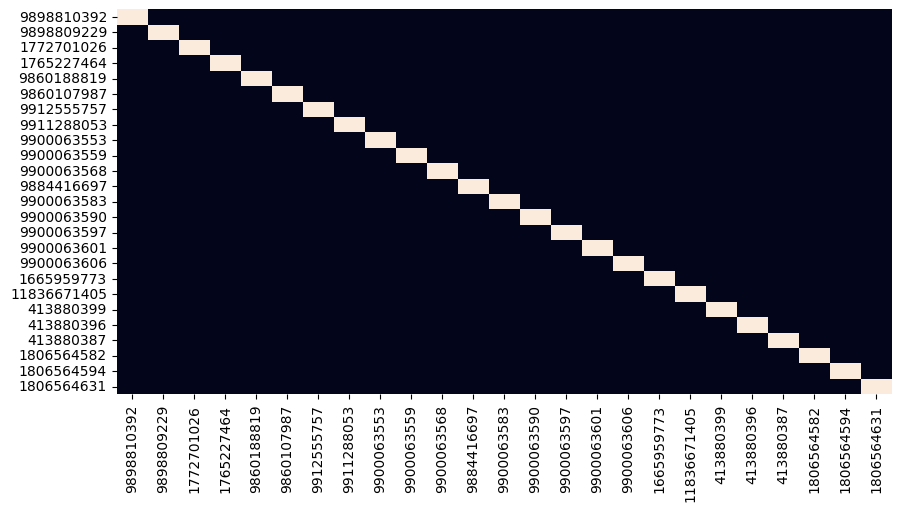

In [40]:
heatmap= distance_matrix.copy()
for col in heatmap.columns:
    heatmap[col]=heatmap[col].apply(lambda x: 
         0.3 if pd.isnull(x) else
         (0.7 if np.isinf(x) else 
          (0 if x!=0 else 1)) )
    
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(heatmap, vmin=0 , vmax=1 , cbar=False, ax=ax)
plt.show()

In [41]:
distance_matrix= distance_matrix.round()
distance_matrix=distance_matrix.astype('int')
distance_matrix

,9898810392,9898809229,1772701026,1765227464,9860188819,9860107987,9912555757,9911288053,9900063553,9900063559,...,9900063601,9900063606,1665959773,11836671405,413880399,413880396,413880387,1806564582,1806564594,1806564631
9898810392,0,98,76,94,158,173,157,210,280,307,...,817,942,988,990,1072,1109,1165,1361,1418,1458
9898809229,87,0,38,56,120,146,158,212,282,309,...,818,944,989,991,1074,1111,1166,1362,1419,1460
1772701026,136,60,0,17,82,108,174,197,267,294,...,804,929,975,976,1059,1096,1152,1347,1405,1445
1765227464,153,86,34,0,64,90,157,179,250,277,...,786,912,957,959,1042,1079,1134,1330,1387,1428
9860188819,105,73,98,116,0,26,92,115,185,213,...,722,848,893,895,978,1014,1070,1266,1323,1363
9860107987,78,95,73,90,155,0,118,171,242,269,...,778,904,949,951,1034,1071,1126,1322,1379,1420
9912555757,98,132,111,128,164,38,0,74,144,172,...,681,807,852,854,937,974,1029,1225,1282,1322
9911288053,154,170,149,166,151,76,75,0,94,121,...,630,756,802,803,886,923,978,1174,1232,1272
9900063553,253,268,247,265,249,174,173,99,0,27,...,537,662,708,710,792,829,885,1080,1138,1178
9900063559,266,282,261,278,263,188,187,112,44,0,...,509,635,680,682,765,802,857,1053,1110,1151


In [42]:
drivers = 1
lst_nodes= dtf["node"].tolist()
print("start:", start_node, "total locations to visit", len(lst_nodes)-1, "drivers", drivers)

start: 9898810392 total locations to visit 24 drivers 1


In [43]:
lst_nodes

[9898810392,
 9898809229,
 1772701026,
 1765227464,
 9860188819,
 9860107987,
 9912555757,
 9911288053,
 9900063553,
 9900063559,
 9900063568,
 9884416697,
 9900063583,
 9900063590,
 9900063597,
 9900063601,
 9900063606,
 1665959773,
 11836671405,
 413880399,
 413880396,
 413880387,
 1806564582,
 1806564594,
 1806564631]

In [44]:
manager = pywrapcp.RoutingIndexManager(len(lst_nodes), drivers, lst_nodes.index(start_node))
model = pywrapcp.RoutingModel(manager)

In [45]:
def get_distance(from_index, to_index):
    return distance_matrix.iloc[from_index, to_index]

distance=model.RegisterTransitCallback(get_distance)
model.SetArcCostEvaluatorOfAllVehicles(distance)

parameters = pywrapcp.DefaultRoutingSearchParameters()
parameters.first_solution_strategy= (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

In [46]:
distance

1

In [47]:
solution= model.SolveWithParameters(parameters)

index=model.Start(0)
print('route for driver:')
route_idx, route_distance = [], 0

while not model.IsEnd(index):
    route_idx.append(manager.IndexToNode(index))
    previous_index=index
    index=solution.Value(model.NextVar(index))
    
    try:
        route_distance +=get_distance(previous_index, index)
    except:
        route_distance+=model.GetArcCostForVehicle(from_index=previous_index, to_index=index, vehicle=0)
        
print(route_idx)
print(f'Total distance:{round(route_distance/1000,2)}km')
print(f'Nodes visited: {len(route_idx)}')

route for driver:
[0, 3, 2, 4, 5, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Total distance:1.97km
Nodes visited: 25


In [48]:
print("Route for driver (nodes):")
lst_route=[lst_nodes[i] for i in route_idx]
print(lst_route)

Route for driver (nodes):
[9898810392, 1765227464, 1772701026, 9860188819, 9860107987, 9898809229, 9912555757, 9911288053, 9900063553, 9900063559, 9900063568, 9884416697, 9900063583, 9900063590, 9900063597, 9900063601, 9900063606, 1665959773, 11836671405, 413880399, 413880396, 413880387, 1806564582, 1806564594, 1806564631]


In [49]:
def get_path_between_nodes(lst_route):
    lst_paths=[]
    for i in range (len(lst_route)):
        try :
            a , b = lst_nodes[i], lst_nodes[i+1]
        except:
            break
        try:
            path=nx.shortest_path(G, source=a, target=b, method ='dijkstra', weight='travel_time')
            if len(path) > 1:
                lst_paths.append(path)
        except:
            continue
    return lst_paths

lst_paths= get_path_between_nodes(lst_route)

for path in lst_paths:
    ox.plot_route_folium(G, route=path, route_map=map, color="blue", weight=1)
    
map

/var/folders/g2/wg8cg2yd079_cdlb5k53ggj00000gn/T/ipykernel_95160/1296747685.py:19: FutureWarning:

The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.

/var/folders/g2/wg8cg2yd079_cdlb5k53ggj00000gn/T/ipykernel_95160/1296747685.py:19: FutureWarning:

The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.

/var/folders/g2/wg8cg2yd079_cdlb5k53ggj00000gn/T/ipykernel_95160/129

In [50]:
def df_animation_multiple_path(G, lst_paths, parallel=True):
    df=pd.DataFrame()
    for path in lst_paths :
        lst_start, lst_end = [] , []
        start_x, start_y = [] , []
        end_x, end_y = [], []
        lst_length, lst_time = [], [] 
        
        for a , b in zip (path[:-1], path[1:]):
            lst_start.append(a)
            lst_end.append(b)
            lst_length.append(round(G.edges[(a,b,0)]['length']))
            lst_time.append(round(G.edges[(a,b,0)]['travel_time']))
            start_x.append(G.nodes[a]['x'])
            start_y.append(G.nodes[a]['y'])
            end_x.append(G.nodes[b]['x'])
            end_y.append(G.nodes[b]['y'])
            
        tmp=pd.DataFrame(list(zip(lst_start, lst_end, start_x, start_y, end_x, end_y, lst_length, lst_time)), 
                         columns= ["start", "end", "start_x", "start_y", "end_x", "end_y", "length", "travel_time"])
        df=pd.concat([df,tmp], ignore_index=(not parallel))
        
    df=df.reset_index().rename(columns={"index":"id"})
    return df
            

In [51]:
import plotly.graph_objects as go
df= pd.DataFrame()
tmp=df_animation_multiple_path(G, lst_paths, parallel=False)
df=pd.concat([df, tmp], axis=0)
first_node, last_node= lst_paths[0][0], lst_paths[-1][-1]

In [52]:
df_start= df[df["start"]== first_node]
df_end=df[df["end"]== last_node]

fig=px.scatter_mapbox(data_frame=df, lon="start_x", lat="start_y", zoom=15, width=900, height=700, animation_frame="id",mapbox_style="carto-positron")

fig.data[0].marker={"size":12}

fig.add_trace(px.scatter_mapbox(data_frame=dtf, lon="stop_lon", lat="stop_lat").data[0])
fig.data[1].marker={"size":10, "color":"black"}

fig.add_trace(px.scatter_mapbox(data_frame=df_start, lon="start_x", lat="start_y").data[0])
fig.data[2].marker={"size":15, "color":"red"}

fig.add_trace(px.scatter_mapbox(data_frame=df_end, lon="end_x", lat="end_y").data[0])
fig.data[3].marker={"size":15, "color":"green"}

# fig.add_trace(px.line_mapbox(data_frame=df, lon="start_x", lat="start_y").data[0])

# Flatten start and end points into a single series
# Add line traces for each row in the DataFrame
# Initialize lists to store all longitude and latitude points for the entire route
all_lon = []
all_lat = []

# Loop through the DataFrame and append start and end coordinates to the lists
for _, row in df.iterrows():
    all_lon.extend([row['start_x'], row['end_x']])  # Add both start and end longitude
    all_lat.extend([row['start_y'], row['end_y']])  # Add both start and end latitude

# Plot the entire route as a single line
fig.add_trace(go.Scattermapbox(
    lon=all_lon,  # All longitude points for the entire route
    lat=all_lat,  # All latitude points for the entire route
    mode='lines',  # Set the mode to 'lines' to draw a continuous line
    line=dict(width=3, color='blue'),
    name="Route"  # Single label for the entire route
))

fig


In [53]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in meters
    R = 6371000
    
    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distance in meters
    distance = R * c
    return distance

In [54]:
import pandas as pd
from datetime import datetime

# Function to check if a driver is on break during a given time (with seconds)
def is_driver_on_break(driver_schedule, current_time):
    # Ensure the current_time is a string
    try:
        current_time = str(current_time)  # Convert to string if not already
        current_time = datetime.strptime(current_time, "%H:%M:%S")  # Now supports hours, minutes, seconds
    except ValueError:
        current_time = datetime.strptime(current_time, "%H:%M")  # Fallback for time without seconds

    # Iterate through the driver schedule to check break timings
    for index, row in driver_schedule.iterrows():
        # Check if the break start or end times are NaN, and skip if so
        if pd.isna(row['break_start_time']) or pd.isna(row['break_end_time']):
            continue
        
        # Ensure break times are treated as strings before parsing
        break_start_time = str(row['break_start_time'])
        break_end_time = str(row['break_end_time'])
        
        # Handle potential time formats with and without seconds
        try:
            break_start = datetime.strptime(break_start_time, "%H:%M:%S")
            break_end = datetime.strptime(break_end_time, "%H:%M:%S")
        except ValueError:
            break_start = datetime.strptime(break_start_time, "%H:%M")
            break_end = datetime.strptime(break_end_time, "%H:%M")
        
        # Check if the current time is within the break window
        if break_start <= current_time <= break_end:
            return row['driver_id']
    return None  # No driver found on break at the given time

In [ ]:
def skip_trip(current_trip):
    index = 

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import plotly.graph_objects as go
import random

# Load driver break timetable data
driver_df = pd.read_csv('schedule/828AUP-Schedule.csv')

# Sample input for demand and threshold value
low_demand_threshold = 5
high_demand_threshold = 15

# Create a Dash app
app = dash.Dash(__name__)

# Load the CSV data
dtf = pd.read_csv('trips/828AUP/142_20_50.csv')

# Initialize demand column if it doesn't exist
dtf['demand'] = [None] * len(dtf)

# Create a Plotly figure for the map
fig = go.Figure(go.Scattermapbox(
    lat=dtf['stop_lat'],
    lon=dtf['stop_lon'],
    mode="markers+text",
    marker={"size": 10, "color": "black"},
    text=dtf['stop_name'],
    textposition="top right",
    name="Bus Stops"
))

# Add bus marker (starting position)
fig.add_trace(
    go.Scattermapbox(
        lat=[df.iloc[0]["start_x"]],
        lon=[df.iloc[0]["start_y"]],
        mode="markers",
        marker=go.scattermapbox.Marker(size=20, color="red", symbol="bus"),
        name="Bus"
    )
)

# Plot the entire route as a single line
fig.add_trace(go.Scattermapbox(
    lon=all_lon,  # All longitude points for the entire route
    lat=all_lat,  # All latitude points for the entire route
    mode='lines',  # Set the mode to 'lines' to draw a continuous line
    line=dict(width=3, color='blue'),
    name="Route"  # Single label for the entire route
))

# Set map layout
fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        zoom=14,
        center={"lat": dtf['stop_lat'].iloc[0], "lon": dtf['stop_lon'].iloc[0]}
    ),
    margin={"l": 0, "r": 0, "t": 0, "b": 0}
)

# Set the size of the graph directly in the layout
app.layout = html.Div([
    dcc.Graph(
        id="live-map",
        figure=fig,
        style={'width': '80vw', 'height': '80vh'}  # Adjust the width and height as needed
    ),
    dcc.Interval(id="interval", interval=250, n_intervals=0),
    html.Div(id="status-panel", style={"fontSize": "18px", "margin": "20px"})  # Updates every second
])

# Global Variables
current_segment = 0
current_time = 0

# Update Map Callback
@app.callback(
    [Output("live-map", "figure"), Output("status-panel", "children")],
    Input("interval", "n_intervals"),
    [State("status-panel", "children")], 
)
def update_map(n_intervals, existing_messages):
    global current_segment, current_time

    # If all segments are done, stop updating
    if current_segment >= len(df):
        return dash.no_update

    # Get the current segment data
    start_lat = df.iloc[current_segment]['start_y']
    start_lon = df.iloc[current_segment]['start_x']
    end_lat = df.iloc[current_segment]['end_y']
    end_lon = df.iloc[current_segment]['end_x']
    travel_time = df.iloc[current_segment]['travel_time']  # Travel time for the current segment

    # Calculate position interpolation
    progress = min(1, current_time / travel_time)  # Fraction of the segment completed
    current_x = start_lon + progress * (end_lon - start_lon)
    current_y = start_lat + progress * (end_lat - start_lat)

    new_message = ""
    # Check if the bus has reached any stop
    for index, row in dtf.iterrows():
        # Calculate distance between the bus and the current stop
        distance = haversine(current_y, current_x, row['stop_lat'], row['stop_lon'])

        # Check if the bus has reached the stop (threshold: 25 meters)
        if distance < 75 and pd.isna(row.get('demand', None)):
            # Assign random demand value between 5 and 20
            demand = random.randint(5, 20)
            dtf.at[index, 'demand'] = demand  # Update demand in the dataframe

            # Update the CSV with the new demand value
            dtf.to_csv('trips/828AUP/142_20_50.csv', index=False)

            current_time_str = row["arrival_time"]
            current_trip_str = row["trip_id"]
            # Log the arrival at the stop
            new_message = html.Div(f"Reached stop: {row['stop_name']} at {row['arrival_time']} - Demand: {demand}.")

            if demand > high_demand_threshold:
                # Find an available driver based on the current time
                driver_id = is_driver_on_break(driver_df, current_time_str)
                
                if driver_id:
                    new_message = html.Div(f"Driver {driver_id} is on break at {current_time_str} and has been assigned to this stop.")
                else:
                    new_message = html.Div(f"No driver available during the current time {current_time_str}.")

            break

    updated_messages = (existing_messages or []) + [html.Div(new_message)] if new_message else existing_messages

    # Create updated map
    fig = go.Figure(go.Scattermapbox(
        lat=[current_y], lon=[current_x],
        mode="markers",
        marker={"size": 15, "color": "red"},
        name="Bus"
    ))

    # Plot the entire route as a single line
    fig.add_trace(go.Scattermapbox(
        lon=all_lon,  # All longitude points for the entire route
        lat=all_lat,  # All latitude points for the entire route
        mode='lines',  # Set the mode to 'lines' to draw a continuous line
        line=dict(width=3, color='blue'),
        name="Route"  # Single label for the entire route
    ))

    # Create a Plotly figure for the map
    fig.add_trace(
        go.Scattermapbox(
        lat=dtf['stop_lat'],
        lon=dtf['stop_lon'],
        mode="markers+text",
        marker={"size": 10, "color": "black"},
        text=dtf['stop_name'],
        textposition="top right",
        name="Bus Stops"
    ))

    # Add demand hotspots as circles
    fig.add_trace(
        go.Scattermapbox(
            lat=dtf["stop_lat"],
            lon=dtf["stop_lon"],
            mode="markers+text",
            text=[f"{demand}" if pd.notna(demand) else "" for demand in dtf["demand"]],
            textposition="bottom left",
            marker=go.scattermapbox.Marker(
                size=[d if pd.notna(d) else 0 for d in dtf.get("demand", [0])],  # Circle size based on demand
                color="orange",
                opacity=0.6
            ),
            name="Demand Hotspots"
        )
    )

    # Update map layout
    fig.update_layout(
        mapbox=dict(
            style="carto-positron",
            zoom=14,
            center={"lat": current_y, "lon": current_x}
        ),
        margin={"l": 0, "r": 0, "t": 0, "b": 0}
    )

    # Update time and segment
    current_time += 1
    if current_time >= travel_time:
        current_segment += 1
        current_time = 0

    return fig, updated_messages

if __name__ == '__main__':
    app.run_server(debug=True)

SyntaxError: incomplete input (690539680.py, line 203)

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objects as go
import random
from datetime import datetime

# Create a Dash app
app = dash.Dash(__name__)

# Load the CSV data
dtf = pd.read_csv('trips/828AUP/142_08_41.csv')

# Initialize demand column if it doesn't exist
dtf['demand'] = [None] * len(dtf)

# Create a Plotly figure for the map
fig = go.Figure(go.Scattermapbox(
    lat=dtf['stop_lat'],
    lon=dtf['stop_lon'],
    mode="markers+text",
    marker={"size": 10, "color": "black"},
    text=dtf['stop_name'],
    textposition="top right",
    name="Bus Stops"
))

# Add bus marker (starting position)
fig.add_trace(
    go.Scattermapbox(
        lat=[dtf.iloc[0]['stop_lat']],
        lon=[dtf.iloc[0]['stop_lon']],
        mode="markers",
        marker=go.scattermapbox.Marker(size=20, color="red", symbol="bus"),
        name="Bus"
    )
)

# Plot the entire route as a single line
fig.add_trace(go.Scattermapbox(
    lon=dtf['stop_lon'],  # All longitude points for the entire route
    lat=dtf['stop_lat'],  # All latitude points for the entire route
    mode='lines',  # Set the mode to 'lines' to draw a continuous line
    line=dict(width=3, color='blue'),
    name="Route"  # Single label for the entire route
))

# Set map layout
fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        zoom=14,
        center={"lat": dtf['stop_lat'].iloc[0], "lon": dtf['stop_lon'].iloc[0]}
    ),
    margin={"l": 0, "r": 0, "t": 0, "b": 0}
)

# Set the size of the graph directly in the layout
app.layout = html.Div([
    dcc.Graph(
        id="live-map",
        figure=fig,
        style={'width': '80vw', 'height': '80vh'}  # Adjust the width and height as needed
    ),
    dcc.Interval(id="interval", interval=1000, n_intervals=0),  # Updates every second
    html.Div(id="status-panel", style={"fontSize": "18px", "margin": "20px"})
])

# Global Variables
current_segment = 0
current_time = 0

# Helper function to calculate haversine distance
def haversine(lat1, lon1, lat2, lon2):
    from math import radians, cos, sin, sqrt, atan2
    R = 6371000  # Earth radius in meters
    phi1, phi2 = radians(lat1), radians(lat2)
    dphi = radians(lat2 - lat1)
    dlambda = radians(lon2 - lon1)
    a = sin(dphi / 2) ** 2 + cos(phi1) * cos(phi2) * sin(dlambda / 2) ** 2
    return R * 2 * atan2(sqrt(a), sqrt(1 - a))

# Update Map Callback
@app.callback(
    [Output("live-map", "figure"), Output("status-panel", "children")],
    Input("interval", "n_intervals")
)
def update_map(n):
    global current_segment, current_time

    # If all segments are done, stop updating
    if current_segment >= len(dtf) - 1:
        return dash.no_update, "Route completed."

    # Get the current segment data
    start_lat = dtf.iloc[current_segment]['stop_lat']
    start_lon = dtf.iloc[current_segment]['stop_lon']
    end_lat = dtf.iloc[current_segment + 1]['stop_lat']
    end_lon = dtf.iloc[current_segment + 1]['stop_lon']
    travel_time = 30  # Assuming 30 seconds between stops for simulation

    # Calculate position interpolation
    progress = min(1, current_time / travel_time)  # Fraction of the segment completed
    current_lon = start_lon + progress * (end_lon - start_lon)
    current_lat = start_lat + progress * (end_lat - start_lat)

    # Check if the bus has reached any stop
    status_message = ""
    for index, row in dtf.iterrows():
        # Calculate distance between the bus and the current stop
        distance = haversine(current_lat, current_lon, row['stop_lat'], row['stop_lon'])

        # Check if the bus has reached the stop (threshold: 75 meters)
        if distance < 75 and pd.isna(row['demand']):
            # Assign random demand value between 5 and 20
            demand = random.randint(5, 20)
            dtf.at[index, 'demand'] = demand  # Update demand in the dataframe

            # Update the CSV with the new demand value
            dtf.to_csv('trips/828AUP/142_08_41.csv', index=False)

            # Log the arrival at the stop
            status_message = f"Reached stop: {row['stop_name']} at {row['arrival_time']} - Demand: {demand}."

            # Move to the next segment
            current_segment += 1
            current_time = 0
            break

    # Create updated map
    fig = go.Figure(go.Scattermapbox(
        lat=[current_lat], lon=[current_lon],
        mode="markers",
        marker={"size": 15, "color": "red"},
        name="Bus"
    ))

    # Plot the entire route as a single line
    fig.add_trace(go.Scattermapbox(
        lon=dtf['stop_lon'],  # All longitude points for the entire route
        lat=dtf['stop_lat'],  # All latitude points for the entire route
        mode='lines',  # Set the mode to 'lines' to draw a continuous line
        line=dict(width=3, color='blue'),
        name="Route"  # Single label for the entire route
    ))

    # Create a Plotly figure for the map
    fig.add_trace(
        go.Scattermapbox(
            lat=dtf['stop_lat'],
            lon=dtf['stop_lon'],
            mode="markers+text",
            marker={"size": 10, "color": "black"},
            text=dtf['stop_name'],
            textposition="top right",
            name="Bus Stops"
        )
    )

    # Add demand hotspots as circles
    fig.add_trace(
        go.Scattermapbox(
            lat=dtf["stop_lat"],
            lon=dtf["stop_lon"],
            mode="markers+text",
            text=[f"{demand}" if pd.notna(demand) else "" for demand in dtf["demand"]],
            textposition="bottom left",
            marker=go.scattermapbox.Marker(
                size=[d if pd.notna(d) else 0 for d in dtf.get("demand", [0])],  # Circle size based on demand
                color="orange",
                opacity=0.6
            ),
            name="Demand Hotspots"
        )
    )

    # Update map layout
    fig.update_layout(
        mapbox=dict(
            style="carto-positron",
            zoom=14,
            center={"lat": current_lat, "lon": current_lon}
        ),
        margin={"l": 0, "r": 0, "t": 0, "b": 0}
    )

    # Update time for the current segment
    current_time += 1

    # If no status message, keep default
    if not status_message:
        status_message = f"Bus is moving to the next stop. Current time: {datetime.now().strftime('%H:%M:%S')}."

    return fig, status_message

if __name__ == '__main__':
    app.run_server(debug=True)
